# Final Project 
## Team Members: Olivia Arena, Deja McCauley, Lindsey Morris and Cassie Truong 
### Assessing Redevelopment Certified Areas Data 
##### Updated Research Question: What is the relationship between historically redlined neighborhoods, lead exposure, and housing investments in Logan, Philadelphia?
###### Source: Open Data Philly 


###### Redevelopment Development certified areas, i.e. areas deemed blighted and eligible for urban renewal by the Philadelphia City Planning Commission under the amended Pennsylvania Urban Redevelopment Law. Blighted areas are defined as meeting one of seven city mandated criteria, including unsafe, unsanitary and inadequate conditions; economically or socially undesirable land use; and faulty street and lot layout.

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import folium 

# for network analysis
import networkx as nx

In [2]:
redev=gpd.read_file('data/Redevelopment_Certified_Areas.geojson')

In [3]:
type(redev)

geopandas.geodataframe.GeoDataFrame

In [4]:
redev.head()

,OBJECTID,AREA,PERIMETER,NAME,YEAR,CORRESPREDEVPLAN,PLANNINGDISTRICT,STATUS,TYPE,EXPIREYEAR,MOSTRECENTRECERT,Shape__Area,Shape__Length,geometry
0,1,None,32911.154689,SOUTH CENTRAL,1948,South Central (1968),Central/South,None,Redevelopment Area Plan,NaN,NaN,5.118445e+06,13073.824844,"POLYGON ((-75.18649 39.94653, -75.18640 39.946..."
1,2,None,2990.741267,57TH & BALTIMORE,1963,Angora (2005),University Southwest/West,None,Redevelopment Area Plan,NaN,2005.0,8.375917e+04,1198.757650,"POLYGON ((-75.23968 39.94601, -75.23952 39.946..."
2,3,None,20044.879373,GRAYS FERRY,1968,Gray's Ferry (1968)/Point Breeze (2001),South,Active,Redevelopment Area Plan and Blight Certification,2029.0,2009.0,2.461036e+06,7264.673398,"POLYGON ((-75.19608 39.93373, -75.19684 39.933..."
3,4,None,11669.990043,POINT BREEZE AND GRAYS FERRY,1968,Gray's Ferry (1968)/Point Breeze (2001),South,Active,Redevelopment Area Plan and Blight Certification,2029.0,2009.0,2.910584e+06,7135.397717,"POLYGON ((-75.16676 39.93787, -75.16835 39.930..."
4,5,None,3304.443432,9TH & ELLSWORTH,2000,9th and Ellsworth (2006),South,None,Redevelopment Area Plan,NaN,NaN,1.127046e+05,1350.770997,"POLYGON ((-75.16088 39.93702, -75.16048 39.936..."


In [5]:
redev.dtypes

OBJECTID               int64
AREA                  object
PERIMETER            float64
NAME                  object
YEAR                  object
CORRESPREDEVPLAN      object
PLANNINGDISTRICT      object
STATUS                object
TYPE                  object
EXPIREYEAR           float64
MOSTRECENTRECERT     float64
Shape__Area          float64
Shape__Length        float64
geometry            geometry
dtype: object

In [6]:
redev.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID          71 non-null     int64   
 1   AREA              0 non-null      object  
 2   PERIMETER         64 non-null     float64 
 3   NAME              71 non-null     object  
 4   YEAR              71 non-null     object  
 5   CORRESPREDEVPLAN  70 non-null     object  
 6   PLANNINGDISTRICT  71 non-null     object  
 7   STATUS            29 non-null     object  
 8   TYPE              71 non-null     object  
 9   EXPIREYEAR        33 non-null     float64 
 10  MOSTRECENTRECERT  42 non-null     float64 
 11  Shape__Area       71 non-null     float64 
 12  Shape__Length     71 non-null     float64 
 13  geometry          71 non-null     geometry
dtypes: float64(5), geometry(1), int64(1), object(7)
memory usage: 7.9+ KB


<AxesSubplot: >

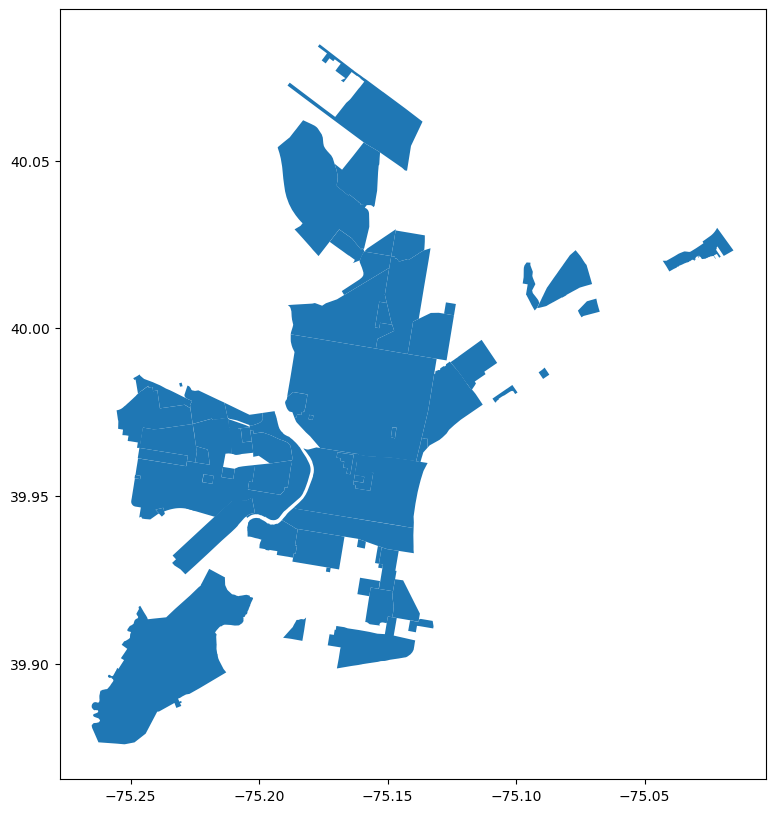

In [7]:
redev.plot(figsize=(12,10))

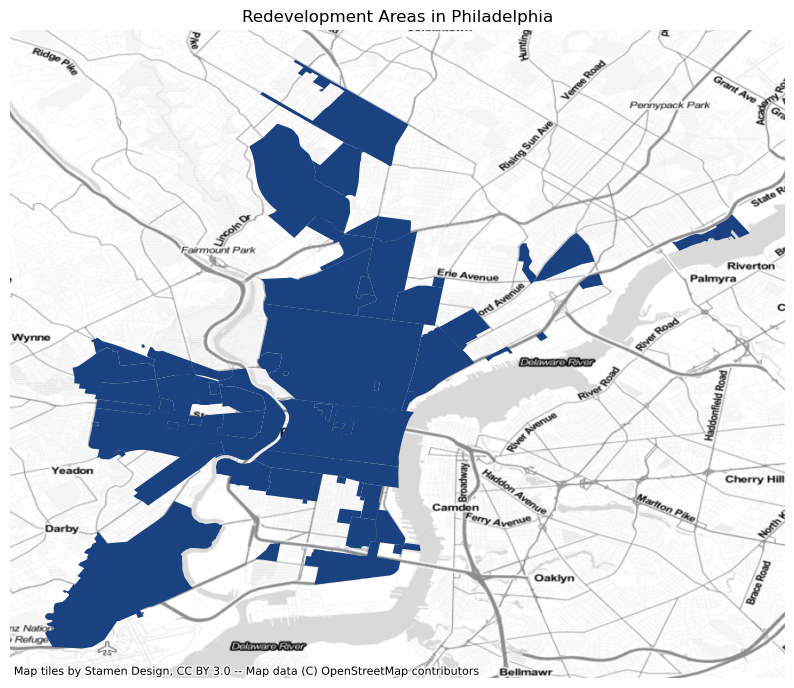

In [8]:
# add basemap
fig, ax = plt.subplots(figsize=(10,10))


redev.plot(ax=ax,
marker='X',
markersize=20,
color='#1a4280ff')


ax.axis('off')


ax.set_title('Redevelopment Areas in Philadelphia')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=4326)

In [9]:
tracts=gpd.read_file('data/Philly Census_Tracts_2010.geojson')

In [10]:
tracts.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
0,1,42,101,009400,42101009400,94,Census Tract 94,G5020,S,366717,0,+39.9632709,-075.2322437,10429,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,2,42,101,009500,42101009500,95,Census Tract 95,G5020,S,319070,0,+39.9658709,-075.2379140,10430,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,3,42,101,009600,42101009600,96,Census Tract 96,G5020,S,405273,0,+39.9655396,-075.2435075,10431,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,4,42,101,013800,42101013800,138,Census Tract 138,G5020,S,341256,0,+39.9764504,-075.1771771,10468,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,5,42,101,013900,42101013900,139,Census Tract 139,G5020,S,562934,0,+39.9750563,-075.1711846,10469,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


<AxesSubplot: >

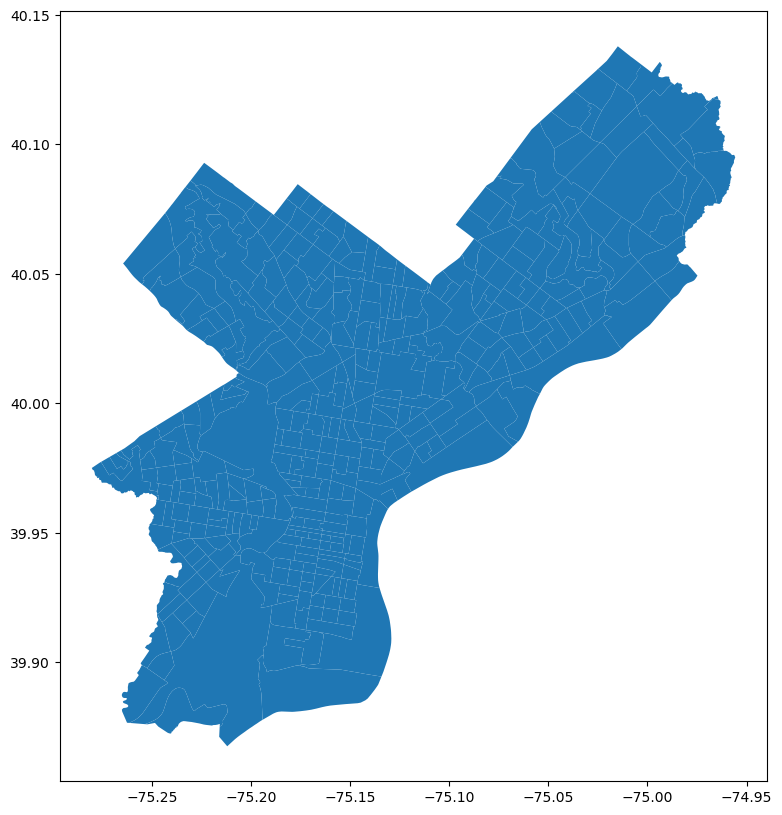

In [11]:
tracts.plot(figsize=(12,10))

In [12]:
#subset the data for FIPS and geometry 
tracts=tracts[['GEOID10','geometry']]

In [13]:
tracts.head() #check the data 

,GEOID10,geometry
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


In [14]:
columns=list(tracts)
columns

['GEOID10', 'geometry']

In [15]:
tracts.columns=['FIPS',
                'geometry']

In [16]:
tracts.head()

,FIPS,geometry
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


In [17]:
logan_FIPS = ["42101028000", "42101028100", "42101028200", "42101028300", "42101028400", "42101028500"]

logan_tracts = tracts[tracts['FIPS'].isin(logan_FIPS)]

logan_boundary = logan_tracts.dissolve()

<AxesSubplot: >

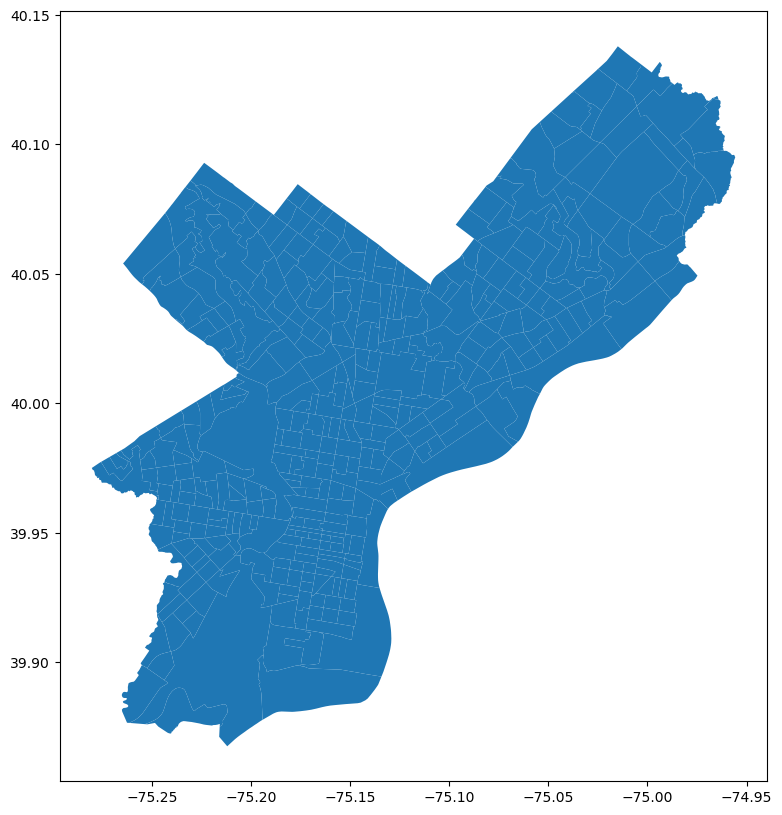

In [18]:
tracts.plot(figsize=(12,10))

In [19]:
philly_boundary=tracts.dissolve()

In [20]:
philly_boundary.describe()

,geometry,FIPS
count,1,1
unique,1,1
top,"POLYGON ((-75.2484329598971 39.8764945656998, ...",42101009400
freq,1,1


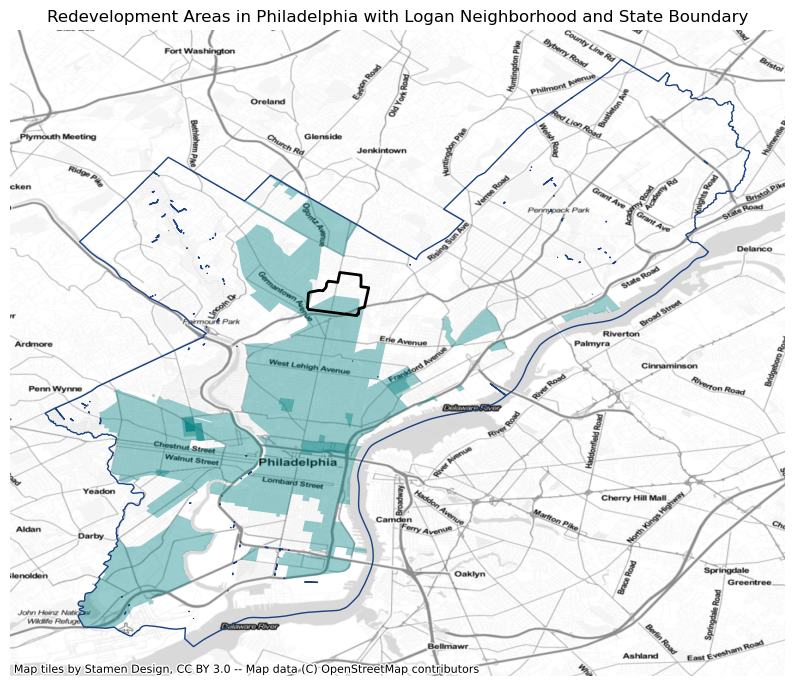

In [21]:
# add basemap
fig, ax = plt.subplots(figsize=(10,10))

redev.plot(ax=ax,
marker='X',
markersize=20,
color='teal', alpha=.4)

philly_boundary.geometry.boundary.plot(color=None,edgecolor='#1a4280ff',linewidth = 1,ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 2,ax=ax)

ax.axis('off')


ax.set_title('Redevelopment Areas in Philadelphia with Logan Neighborhood and State Boundary')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=4326)

